## Line Plots

In [1]:
import os
os.chdir("projects_on_GitHub/data_viz/Visualization_with_mpl_and_sns")

In [2]:
# 导入数据
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### Example 1: Line plots with sunmmary statistics

In [4]:
# Preparatory Step: convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);


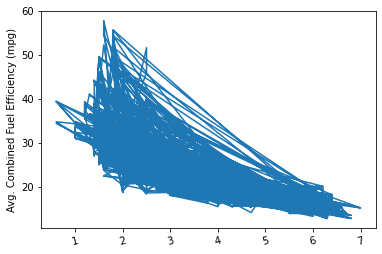

In [7]:
plt.errorbar(data=fuel_econ, x='displ', y='comb')
# plt.plot(fuel_econ['displ'], fuel_econ['comb'])    # 也可以用此函数
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');


If we just blindly stick a dataframe into the function without considering its structure, we might end up with a mess like the above. The function just plots all the data points as a line, connecting values from the first row of the dataframe to the last row. In order to create the line plot as intended, we need to do additional work to summarize the data.

In [8]:
fuel_econ[['comb', 'displ']]


,comb,displ
0,18.7389,3.8
1,25.2227,2.0
2,20.6716,3.6
3,19.8774,3.6
4,28.6813,2.4
...,...,...
3924,54.4329,1.8
3925,41.0000,2.0
3926,42.0000,2.0
3927,23.0021,3.4


In [9]:
# 关于’displ‘字段的统计
fuel_econ['displ'].describe()

count    3929.000000
mean        2.950573
std         1.305901
min         0.600000
25%         2.000000
50%         2.500000
75%         3.600000
max         7.000000
Name: displ, dtype: float64

In [10]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(0.6, 7+0.2, 0.2)

# 由于每个bin的宽度为0.2，因此每个bin的中心=下边界+组距/2，即下边界+0.1
bin_centers = bin_edges[:-1] + 0.1

# Cut the bin values into discrete intervals. Returns a Series object.
# include_lowest=True表示包括0.6 （如[1, 2 ,3 ,4]， 则bin_edges=[[1, 2], (2, 3], (3, 4]]）
displ_binned = pd.cut(fuel_econ['displ'], bin_edges, include_lowest = True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

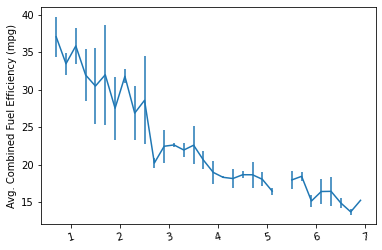

In [11]:
# For the points in each bin, we compute the mean and standard error of the mean.
# groupby语句不仅可以按照DataFrame中的固有字段进行分组，还可以自定义分组规则（大小与原df保持一致）
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

# Plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

Since the x-variable ('displ') is continuous, we first set a number of bins into which the data will be grouped. In addition to the usual edges, the center of each bin is also computed for later plotting. For the points in each bin, we compute the mean and standard error of the mean.  

Documentation: Refer to the [cut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) function syntax.



### Example 2: Trial with a faked dataset

In [22]:
greek = ['Alpha', 'Beta', 'Gamma', 'Delta']
df = pd.DataFrame({
    'cat_var': np.random.choice(greek, 300, p=[0.5, 0.1, 0.1, 0.3]),
    'num_var': np.random.normal(3, 2.5, size=300)
})

In [23]:
df

,cat_var,num_var
0,Delta,4.655923
1,Delta,-2.018544
2,Delta,6.936941
3,Delta,4.612075
4,Alpha,2.815504
...,...,...
295,Alpha,2.615058
296,Delta,1.578703
297,Alpha,-0.889515
298,Alpha,2.314672


In [32]:
df.num_var.describe()

count    300.000000
mean       2.820985
std        2.449754
min       -5.482220
25%        1.169343
50%        2.833318
75%        4.502642
max        9.605187
Name: num_var, dtype: float64

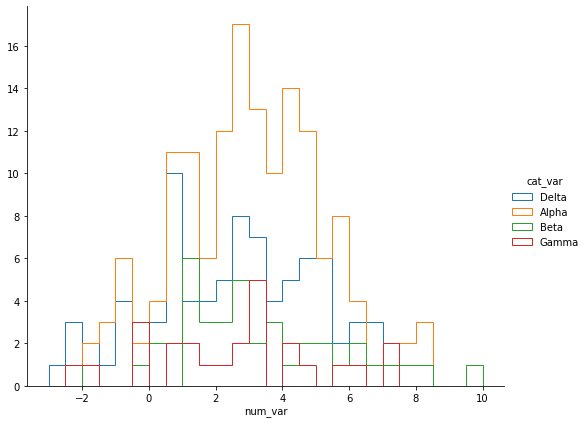

In [42]:
bin_edges = np.arange(-3, df['num_var'].max()+.5, .5)
g = sns.FacetGrid(data = df, hue = 'cat_var', height = 6, aspect=1.2)
g.map(plt.hist, "num_var", bins = bin_edges, histtype = 'step')
g.add_legend()

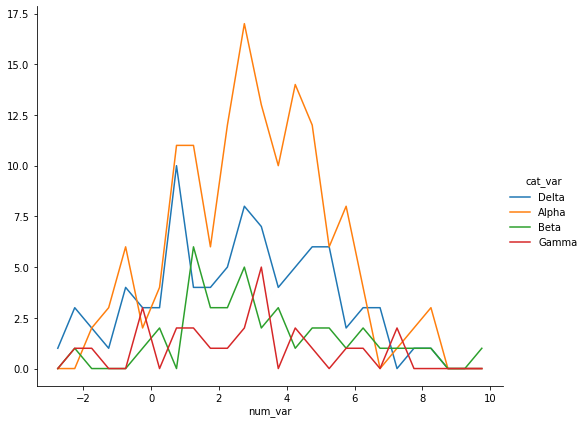

In [41]:
def freq_poly(x, bins = 10, **kwargs):
    """ Custom frequency polygon / line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    counts = x.groupby(data_bins).count()

    # create plot
    plt.errorbar(x = bin_centers, y = counts, **kwargs)

bin_edges = np.arange(-3, df['num_var'].max()+.5, .5)
g = sns.FacetGrid(data = df, hue = 'cat_var', height = 6, aspect=1.2)
g.map(freq_poly, "num_var", bins = bin_edges)
g.add_legend()

In [43]:
df1 = pd.DataFrame({'num_var1': np.random.normal(2, 1, size=300), 'num_var2': np.random.normal(100, 2, size=300)})
df1

,num_var1,num_var2
0,1.616779,99.681923
1,3.579326,101.662185
2,2.497401,100.065339
3,2.171288,101.880762
4,4.631549,97.484064
...,...,...
295,0.850899,100.532315
296,1.439552,97.694579
297,0.006141,97.758013
298,3.266437,97.497110


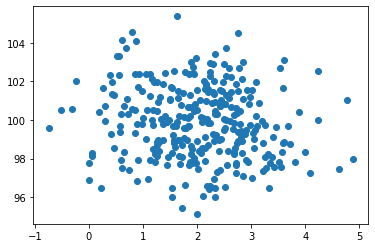

In [45]:
plt.scatter(data=df1, x='num_var1', y='num_var2');

In [47]:
df1.num_var1.describe()

count    300.000000
mean       2.019983
std        0.971580
min       -0.747538
25%        1.370310
50%        2.075679
75%        2.682085
max        4.881273
Name: num_var1, dtype: float64

In [ ]:
bin_edges = np.arange(-0.8, 5)

In [62]:
1+np.log10(300)/np.log10(2)

9.228818690495881

In [76]:
w = 0.5
n = np.ceil((df1.num_var1.max() - df1.num_var1.min()) / w)

In [77]:
n = int(n)

In [78]:
n

12

(array([ 3.,  6., 21., 24., 42., 53., 63., 46., 23., 12.,  4.,  3.]),
 array([-0.74753765, -0.27847013,  0.1905974 ,  0.65966492,  1.12873245,
         1.59779997,  2.0668675 ,  2.53593502,  3.00500255,  3.47407007,
         3.9431376 ,  4.41220512,  4.88127265]),
 <BarContainer object of 12 artists>)

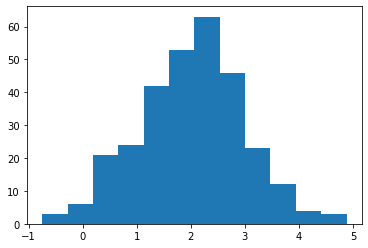

In [79]:
plt.hist(data=df1, x='num_var1', bins=n)